# Idea of pointers in Python



**Variables in Python are pointers (for all but the basic most types)**

**The equal “=” assignment operator automatically creates a pointer** - unless it is a basic type (called an immutable): int, float, str, bool are basic types, and these are not pointers.

Lists, dicts, class objects etc are pointers.

So if you have a **variable “a”** representing **a list** (which is not a basic type) :-


In [155]:
a = [1,2,3]

Statement above creates the *list* object **and also creates a pointer to it called “a”**

if assign b = a:

In [160]:
b = a

**both *a* and *b* are pointers to the same list object!!!!**

To check it let's mend *b* and look at output of *a*

In [157]:
b[0] = 4

print(a)

[4, 2, 3]


Its not like in C where new variable after assignment creates copy of object

We can check it as follows as well:

In [161]:
a == b

True

*a* and *b* are pointers to **same object**

In [162]:
print(hex(id(a)), hex(id(b)))

0x29a1477b740 0x29a1477b740


**id()** finction returns adress of same object

**Only when all pointers to the object are removed does python delete it**.

So you could del *a* or del *b* and python will still store the object.

Only when you del the last pointer to it, is the object removed from memory.

Remember I said simple types are not pointers so :-

In [199]:
c = 10
d = c
print(d)
print(id(c), id(d))
c == d

10
140720141424576 140720141424576


True

Seems like for now they are pointing to same object

These are not pointing to the same object, as it is a simple type (int). 

In [196]:
c = 100
print(c)
print(d)
print(id(c) == id(d))
c == d

100
10
False


False

Will not set *d* to 100, *d* will remain at 10

In [197]:
print(id(c) == id(d))

False


In [198]:
c == d

False

https://books.google.com.ua/books?id=F7zADwAAQBAJ&pg=PA467&lpg=PA467&dq=why+x+%3D%3D+y+false+id(x)+%3D%3D+id(y)+true&source=bl&ots=CZIoBzm5yA&sig=ACfU3U1ofK8NssW0Zqa1vgniZuZDyqvWnw&hl=en&sa=X&ved=2ahUKEwiI2ca_l9HoAhW5BhAIHXvOC7MQ6AEwC3oECAsQNw#v=onepage&q&f=true

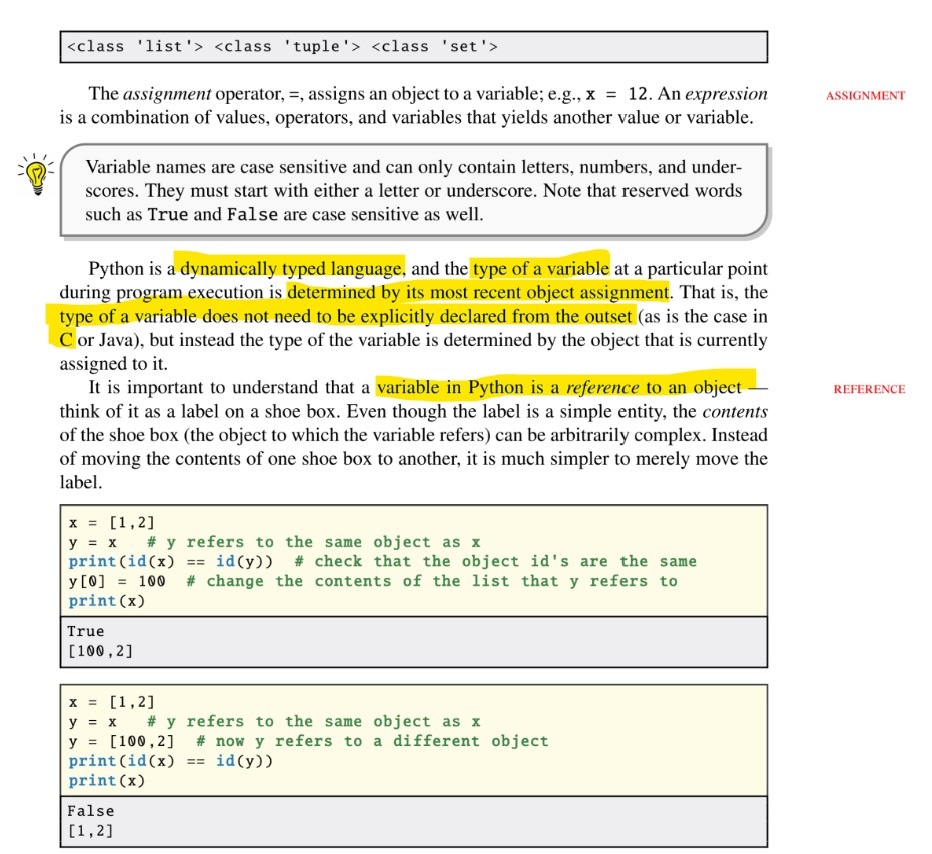

In [1]:
e = 24
f = e
print(f)
print(id(e) == id(f))
f = 35
print(f)
print(id(f) == id(e))

24
True
35
False


# class Node

Let's create some class named Node

And some basic methods for it

In [282]:
class Node:
    # current and count varable only need for iter and next
    current = None
    count = 0
    def __init__(self, value, next_n=None):
        self.value = value
        self.next_n = next_n
        
        #let's create some simple methods
       # To print all connected nodes and head node 
    def print_node(self):
        curs = self
        while curs:
            print(curs.value)
            curs = curs.next_n
            
        # to connect to other Node
    def connect(self, connected_node):
        self.next_n = connected_node
        return self
    
    
    # Make linked list iterable. This is where we need a count and current variables
    
    # here we define what objects will be an iterator. Node itself
    def __iter__(self):
        return self
    
    
    def __next__(self):
        # Make first occasion when first iterarator equal to self
        if Node.count == 0:
            iterator = Node.current = self
            Node.count += 1
            Node.current = Node.current.next_n
            return iterator
        # next will be all the following ones untill Node does't exist (==None)
        elif Node.current:
            iterator = Node.current
            Node.current = (Node.current).next_n
            Node.count += 1
            return iterator
        raise StopIteration


In [283]:
head = Node(0)

In [284]:
first = Node(1,head)

In [285]:
print(first.value)

1


In [286]:
second = Node(2,first)

In [287]:
third = Node(3,second)

In [288]:
forth = Node(4,third)

In [289]:
forth.print_node()

4
3
2
1
0


In [290]:
fifth = Node(5)

In [291]:
create_one_node = fifth.connect(forth)

In [292]:
create_one_node.print_node()

5
4
3
2
1
0


In [293]:
new_node = Node(5,forth)

In [294]:
print(next(new_node).value)
print(next(new_node).value)
print(next(new_node).value)


5
4
3


In [295]:
print(next(new_node).value)

2


In [296]:
print(next(new_node).value)

1


In [297]:
print(next(new_node).value)

0


In [298]:
print(next(new_node).value)

StopIteration: 

Let's create some set of words (as for dictionary)

In [19]:
set_of_words = '''some
set
of
words
in
one
string'''
print(set_of_words)

some
set
of
words
in
one
string


Now create linked list from given string

Each word will be added to end of list

In [20]:
linked_words = None
tmp = None
for word in set_of_words.split('\n'):
    if linked_words == None:
        linked_words = Node(word)
        tmp = linked_words
    else:
        new_node = Node(word)                            # on all instances of 'word' - new node created
        if not new_node:
            print('error in allocation memory')
        else:
            tmp.next_n = new_node               # here next_n is basically a poiter to object Node(new_node)
            tmp = new_node
tmp = None

In [21]:
linked_words.print_node()

some
set
of
words
in
one
string


The other way to do it - to insert each word to next_n of head linked list

In [ ]:
'''linked_words = None
tmp = None
for word in set_of_words.split('\n'):
    if linked_words == None:
        linked_words = Node(word)
    else:
        new_node = Node(word)                            # on all instances of 'word' - new node created
        if not new_node:
            print('error in allocation memory')
        else:
            linked_words.next_n = new_node               # here next_n is basically a poiter to object Node(new_node)
            new_node.next_n = tmp
            tmp = new_node
tmp = None
'''